In [167]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [168]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [169]:
x_org, y_org = iris.data, iris.target
x_org.shape, y_org.shape

((150, 4), (150,))

In [170]:
import pandas as pd
csv_file = iris['filename']
iris_df = pd.read_csv(csv_file)
iris_df.columns = iris.feature_names+['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 二元分類
- 根據sepal_length, sepal_width
- 分類 setosa, versicolour(0, 1)兩種品種

In [213]:
x_data, y_data = iris.data[:100, :2], iris.target[:100]
#100個training data
x_data.shape, y_data.shape

((100, 2), (100,))

In [214]:
x_data = np.insert(x_data, 0, 1, axis=1)
x_data.shape

(100, 3)

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
#分割訓練資料、測試資料
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, 
    random_state=123
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 3), (30, 3), (70,), (30,))

<function matplotlib.pyplot.show(close=None, block=None)>

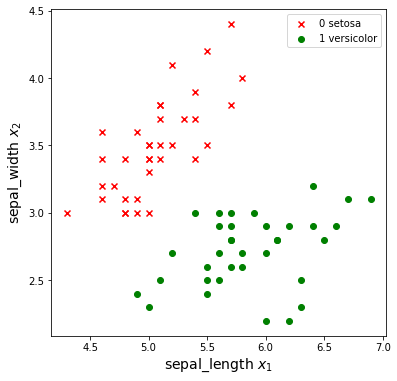

In [217]:
#資料散布圖
import matplotlib.pyplot as plt
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]

plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='red', label='0 setosa')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='green', label='1 versicolor')
plt.xlabel(r'sepal_length $x_1$', fontsize=14)
plt.ylabel(r'sepal_width $x_2$', fontsize=14)
#plt.xticks(size=16)
#plt.yticks(size=16)
plt.legend()
plt.show

## 訓練設定

In [218]:
x = x_train
yt = y_train
x[:5], yt[:5]

(array([[1. , 5.1, 3.7],
        [1. , 5.5, 2.6],
        [1. , 5.5, 4.2],
        [1. , 5.6, 2.5],
        [1. , 5.4, 3. ]]),
 array([0, 1, 0, 1, 1]))

$$
sigmoid: f(u) = \frac{1}{1+e^{-u}}\\
x@w \rightarrow u \rightarrow f(u) \rightarrow yp
$$

In [219]:
def sigmoid(u):
    return 1/(1+np.exp(-u))
def pred(x, w):
    return sigmoid(x @ w)

$$
Cross\,entropy: 
-\frac{1}{M}\sum_{m=0}^{M-1}(yt^m\,log(yp^m)) + (1-yt)\,log(1-yp^m))
$$

In [220]:
def cross_entropy(yt, yp):
    ce1 = -(yt*np.log(yp) + (1-yt)*np.log(1-yp))
    #計算平均
    return np.mean(ce1)

In [221]:
def classify(y):
    #判斷如果y<0.5就輸出0, 反之輸出1
    return np.where(y<0.5, 0, 1)

In [222]:
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    yp = pred(xt, w)
    loss = cross_entropy(yt, yp)
    yp_b = classify(yp)
    score = accuracy_score(yt, yp_b)
    return loss, score

## 開始訓練

In [223]:
M = x.shape[0]
D = x.shape[1]
#M, D #70, 3
iters = 10000
η = 0.01
w = np.ones(D)
history = np.zeros((0,3))

In [224]:
for k in range(iters):
    yp = pred(x, w)
    yd = yp-yt
    w = w - η*(x.T @ yd) / M
    if(k%10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, np.array([k, loss, score])))
        print('iter = %d, loss = %f, score = %f'%(k, loss, score))

iter = 0, loss = 4.493842, score = 0.500000
iter = 10, loss = 3.565375, score = 0.500000
iter = 20, loss = 2.643280, score = 0.500000
iter = 30, loss = 1.762444, score = 0.500000
iter = 40, loss = 1.085375, score = 0.500000
iter = 50, loss = 0.818721, score = 0.500000
iter = 60, loss = 0.770934, score = 0.500000
iter = 70, loss = 0.761053, score = 0.333333
iter = 80, loss = 0.754468, score = 0.200000
iter = 90, loss = 0.747781, score = 0.166667
iter = 100, loss = 0.740979, score = 0.133333
iter = 110, loss = 0.734193, score = 0.166667
iter = 120, loss = 0.727485, score = 0.200000
iter = 130, loss = 0.720875, score = 0.200000
iter = 140, loss = 0.714368, score = 0.266667
iter = 150, loss = 0.707967, score = 0.300000
iter = 160, loss = 0.701670, score = 0.366667
iter = 170, loss = 0.695476, score = 0.433333
iter = 180, loss = 0.689383, score = 0.500000
iter = 190, loss = 0.683389, score = 0.566667
iter = 200, loss = 0.677493, score = 0.700000
iter = 210, loss = 0.671693, score = 0.700000

In [225]:
print('開始: loss=%f, accracy=%f'%(history[0,1], history[0,2]))
print('結束: loss=%f, accracy=%f'%(history[-1,1], history[-1,2]))

開始: loss=4.493842, accracy=0.500000
結束: loss=0.153947, accracy=0.966667


## 訓練結果畫圖

In [226]:
x_train0 = x_train[y_train==0]
x_train1 = x_train[y_train==1]
x_test0 = x_test[y_test==0]
x_test1 = x_test[y_test==1]
#x_t0, y_test

In [227]:
#畫直線用 w0 + w1x1 + w2x2 = 0
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])
xl = np.asarray([x[:,1].min(), x[:,1].max()])
x2 = b(xl, w)

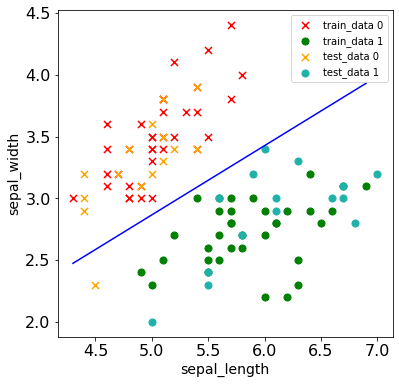

In [228]:
plt.figure(figsize=(6,6))
plt.scatter(x_train0[:,1], x_train0[:,2], marker='x', c='red', s=50, label='train_data 0')
plt.scatter(x_train1[:,1], x_train1[:,2], marker='o', c='green', s=50, label='train_data 1')
plt.scatter(x_test0[:,1], x_test0[:,2], marker='x', c='orange', s=50, label='test_data 0')
plt.scatter(x_test1[:,1], x_test1[:,2], marker='o', c='lightseagreen', s=50, label='test_data 1')

plt.plot(xl, x2, c='blue')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend()
plt.show()

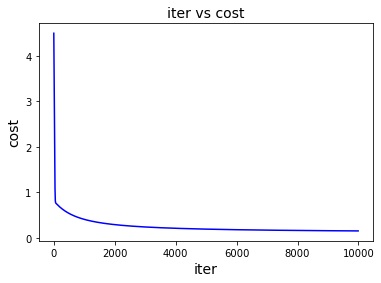

In [229]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

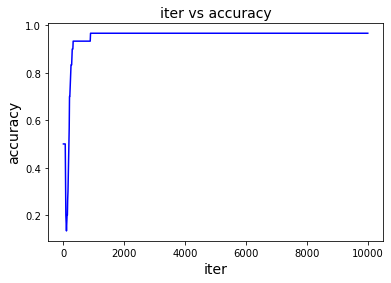

In [230]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

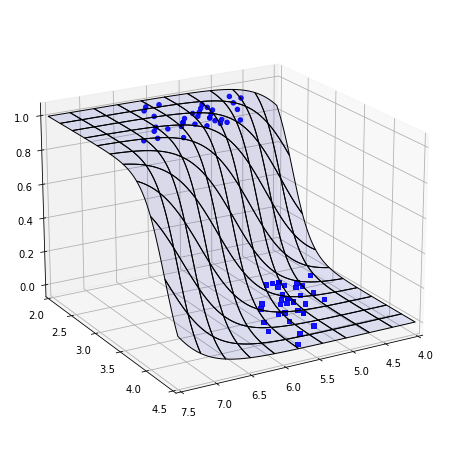

In [231]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(2, 4.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.asarray([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
c = pred(xxx, w).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.1)
ax.scatter(x_t1[:,1], x_t1[:,2], 1, s=20, alpha=0.9, marker='o', c='b')
ax.scatter(x_t0[:,1], x_t0[:,2], 0, s=20, alpha=0.9, marker='s', c='b')
ax.set_xlim(4,7.5)
ax.set_ylim(2,4.5)
ax.view_init(elev=20, azim=60)

## 用scikit-learn

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

model_lr = LogisticRegression(solver='liblinear')
#model_svm = svm.SVC(kernel='linear')

model_lr.fit(x, yt)
#model_svm.fit(x, yt)

LogisticRegression(solver='liblinear')

In [241]:
w0 = model_lr.intercept_[0]
w1 = model_lr.coef_[0,1]
w2 = model_lr.coef_[0,2]
w0, w1, w2, model_lr.coef_

(-0.23261152205479463,
 1.972364858794143,
 -3.2948802061679996,
 array([[-0.23261152,  1.97236486, -3.29488021]]))

In [242]:
model_lr.classes_

array([0, 1])

In [243]:
# 畫線用
def rl(x):
    wk = w0 + w1 * x
    wk2 = -wk / w2
    return(wk2)

In [244]:
y_rl = rl(xl)

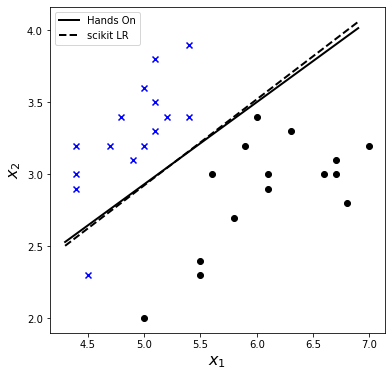

In [245]:

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

plt.scatter(x_test0[:,1], x_test0[:,2], marker='x', c='b')
plt.scatter(x_test1[:,1], x_test1[:,2], marker='o', c='k')

ax.plot(xl, yl, linewidth=2, c='k', label='Hands On')

ax.plot(xl, y_rl, linewidth=2, c='k', linestyle="--", label='scikit LR')
# svm
#ax.plot(xl, y_svm, linewidth=2, c='k', linestyle="-.", label='scikit SVM')

ax.legend()
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
plt.show()

In [238]:
x

array([[1. , 5.1, 3.7],
       [1. , 5.5, 2.6],
       [1. , 5.5, 4.2],
       [1. , 5.6, 2.5],
       [1. , 5.4, 3. ],
       [1. , 6.3, 2.3],
       [1. , 5.7, 3. ],
       [1. , 6.2, 2.9],
       [1. , 6. , 2.2],
       [1. , 4.8, 3. ],
       [1. , 5.4, 3.4],
       [1. , 5.5, 2.5],
       [1. , 4.9, 3.6],
       [1. , 5.2, 2.7],
       [1. , 4.9, 3. ],
       [1. , 6.4, 2.9],
       [1. , 4.8, 3.4],
       [1. , 5.7, 2.6],
       [1. , 5.8, 4. ],
       [1. , 6.5, 2.8],
       [1. , 5.4, 3.9],
       [1. , 5. , 3.4],
       [1. , 6.4, 3.2],
       [1. , 4.8, 3. ],
       [1. , 4.6, 3.4],
       [1. , 5.1, 2.5],
       [1. , 4.8, 3.1],
       [1. , 5.1, 3.8],
       [1. , 6.3, 2.5],
       [1. , 5. , 3.5],
       [1. , 5.7, 4.4],
       [1. , 5.6, 2.7],
       [1. , 5.7, 3.8],
       [1. , 4.3, 3. ],
       [1. , 4.6, 3.6],
       [1. , 5.4, 3.7],
       [1. , 6.6, 2.9],
       [1. , 6.1, 2.8],
       [1. , 5.6, 2.9],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.5],
       [1. , 4.9